# Les festivals en France 


Ce projet est pensé dans le cadre du cours de data science durant la 2e année à l'ENSAE et il a pour objectif d'étudier le lien qui peut exister entre les caractéristiques d'un festival et son lieu d'implantation (en particulier, sa commune et les caractéristiques socio-démographiques de sa population). 

## Installation et importation des données

In [10]:
!pip install pandas
!pip install statsmodels
!pip install sklearn
!pip install geopandas
!pip install openpyxl


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\lilou\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\lilou\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\lilou\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\lilou\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import random
import math 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import geopandas as gpd
from matplotlib.animation import PillowWriter, FuncAnimation
from matplotlib import rc, animation

from fonction import ligne, nom_de_colonne, carte_1_an_rapide, carte_1_an, carte_1_an_bis, region_sans_dom, academie_sans_dom ,carte_fest_marche, lecture_fichier, data_1_an, carte_fest, hist_date_festi, hist_date_pano, into_md, carte_fest_debug, festi_sans_dom, festi_sans_dom_shapefile, make_fond_carte


# PARTIE 1 - RECUPERATION ET TRAITEMENT DES DONNEES

## Récupération des données


On récupère les données sur les festivals, en csv et en shapefile, ainsi que les données tirées du recensement et les données des fonds de cartes. 

### Données des festivals en csv

In [12]:
# Ouvrir et lire le fichier CSV - données des festivals csv
csv_url = 'https://www.data.gouv.fr/fr/datasets/r/47ac11c2-8a00-46a7-9fa8-9b802643f975'
df_festival = pd.read_csv(csv_url, sep = ';')
df_festival.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_postal_de_la_commune_principale_de_deroulement,code_insee_commune,code_insee_epci_collage_en_valeur,libelle_epci_collage_en_valeur,numero_de_voie,...,sous_categorie_musique,sous_categorie_musique_cnm,sous_categorie_cinema_et_audiovisuel,sous_categorie_arts_visuels_et_arts_numeriques,sous_categorie_livre_et_litterature,periode_principale_de_deroulement_du_festival,identifiant_agence_a,identifiant,geocodage_xy,identifiant_cnm
0,Gamerz,Départementale,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,Aix-en-Provence,13090,13001,200054807,Métropole d'Aix-Marseille-Provence,1,...,NaN,NaN,NaN,Arts numériques,NaN,Après-saison (6 septembre - 31 décembre),NaN,FEST_13001_49,"43.5360708378,5.39857444582",NaN
1,Corsiclassic - festival de musique de chambre,NaN,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,NaN,...,Musique classique,NaN,NaN,NaN,NaN,Après-saison (6 septembre - 31 décembre),NaN,FEST_2A004_85,"41.9347926638,8.70132275974",NaN
2,Racines de ciel,NaN,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,50-52,...,NaN,NaN,NaN,NaN,"Fiction (roman, théâtre, etc.), Non-fiction (d...",Avant-saison (1er janvier - 20 juin),NaN,FEST_2A004_96,"41.9347926638,8.70132275974",NaN
3,Le grand bivouac,Intercommunale,Auvergne-Rhône-Alpes,Savoie,Albertville,73200,73011,200068997,CA Arlysère,88 bis,...,NaN,NaN,Films documentaires courts et moyens métrages,NaN,NaN,Après-saison (6 septembre - 31 décembre),NaN,FEST_73011_104,"45.6683987277,6.40460338643",NaN
4,Festival Acthea,NaN,Occitanie,Tarn,Albi,81000,81004,248100737,CA de l'Albigeois (C2A),NaN,...,NaN,NaN,NaN,NaN,NaN,Avant-saison (1er janvier - 20 juin),NaN,FEST_81004_113,"43.9258213622,2.14686328555",NaN


### Données des festivals en shapefile

In [13]:
# Ouvrir et lire le fichier shp - données des festivals shp
shp_url = 'https://www.data.gouv.fr/fr/datasets/r/4f4af114-7f43-4033-bb33-910274fd3ce3'
shp_festival = gpd.read_file(shp_url)
shp_festival.head()

,nom_du_fest,envergure_t,region_prin,departement,commune_pri,code_postal,code_insee_,libelle_epc,numero_de_v,type_de_voi,...,complement_,site_intern,adresse_e_m,decennie_de,annee_de_cr,discipline_,sous_catego,periode_pri,identifiant,geometry
0,Gamerz,DÃ©partementale,Provence-Alpes-CÃ´te d'Azur,Bouches-du-RhÃ´ne,Aix-en-Provence,13090,200054807,MÃ©tropole d'Aix-Marseille-Provence,1,Place,...,Patio du bois de l'aune,http://www.lab-gamerz.com/site/,contact@lab-gamerz.com,De 2000 Ã 2009,2006,"Arts visuels, arts numÃ©riques",None,AprÃ¨s-saison (6 septembre - 31 dÃ©cembre),None,POINT (5.39857 43.53607)
1,Corsiclassic - festival de musique de chambre,None,Corse,Corse-du-Sud,Ajaccio,20000,242010056,CA du Pays Ajaccien,None,Rue,...,CathÃ©drale d'Ajaccio,helloasso.com/associations/corsiclassic,Corsiclassic@gmail.com ou bartoli.jeanne@wanad...,2010 et aprÃ¨s,2016,Musique,None,AprÃ¨s-saison (6 septembre - 31 dÃ©cembre),None,POINT (8.70132 41.93479)
2,Racines de ciel,None,Corse,Corse-du-Sud,Ajaccio,20000,242010056,CA du Pays Ajaccien,50-52,Rue,...,None,https://www.facebook.com/RacinesDeCielAjaccio/,Viagrenelle@gmail.com,De 2000 Ã 2009,2009,"Livre, littÃ©rature","Fiction (roman, thÃ©Ã¢tre, etc.), Non-fiction ...",Avant-saison (1er janvier - 20 juin),None,POINT (8.70132 41.93479)
3,Le grand bivouac,Intercommunale,Auvergne-RhÃ´ne-Alpes,Savoie,Albertville,73200,200068997,CA ArlysÃ¨re,88 bis,Rue,...,Le Grand Bivouac d'Albertville,https://www.grandbivouac.com/fr,communication@grandbivouac.org,De 2000 Ã 2009,2002,"CinÃ©ma, audiovisuel",None,AprÃ¨s-saison (6 septembre - 31 dÃ©cembre),None,POINT (6.40460 45.66840)
4,Festival Acthea,None,Occitanie,Tarn,Albi,81000,248100737,CA de l'Albigeois (C2A),None,AllÃ©e,...,Ecoles Des Mines D'albi - Campus Jarlard,https://www.mines-albi.fr/acthea-17e-edition-d...,None,None,None,Spectacle vivant,None,Avant-saison (1er janvier - 20 juin),None,POINT (2.14686 43.92582)


### Données tirées du recensement de 2019

In [14]:
xlsx_file_path  = 'base-cc-evol-struct-pop-2019.xlsx'

# Lire le fichier Excel dans un DataFrame
df = pd.read_excel(xlsx_file_path)

# Nom de destination pour le fichier CSV
csv_commune = 'base-cc-evol-struct-pop-2019.csv'

# Conversion du DataFrame en CSV
df.to_csv(csv_commune, index=False)

# Affichage des premières lignes du DataFrame converti en CSV
df_csv = pd.read_csv(csv_commune)

df_csv.head()

C:\Users\lilou\AppData\Local\Temp\ipykernel_4368\1571057630.py:13: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(csv_commune)


,Chiffres détaillés – Évolution et structure de la population,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107
0,France hors Mayotte - Communes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mise en ligne le 27/06/2022 Géographie a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"@Insee Source(s) : Insee, Recensements d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Code géographique,Région,Département,Libellé géographique,Population en 2019 (princ),Pop 0-14 ans en 2019 (princ),Pop 15-29 ans en 2019 (princ),Pop 30-44 ans en 2019 (princ),Pop 45-59 ans en 2019 (princ),Pop 60-74 ans en 2019 (princ),...,Pop 25-54 ans Autres en 2019 (compl),Pop 55 ans ou plus en 2019 (compl),Pop 55 ans ou plus Agriculteurs exploitants en...,"Pop 55 ans ou plus Artisans, Comm., Chefs entr...","Pop 55 ans ou plus Cadres, Prof. intel. sup. e...",Pop 55 ans ou plus Prof. intermédiaires en 201...,Pop 55 ans ou plus Employés en 2019 (compl),Pop 55 ans ou plus Ouvriers en 2019 (compl),Pop 55 ans ou plus Retraités en 2019 (compl),Pop 55 ans ou plus Autres en 2019 (compl)
4,CODGEO,REG,DEP,LIBGEO,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,...,C19_POP2554_CS8,C19_POP55P,C19_POP55P_CS1,C19_POP55P_CS2,C19_POP55P_CS3,C19_POP55P_CS4,C19_POP55P_CS5,C19_POP55P_CS6,C19_POP55P_CS7,C19_POP55P_CS8


### Données du fond de carte de la France

<Axes: >

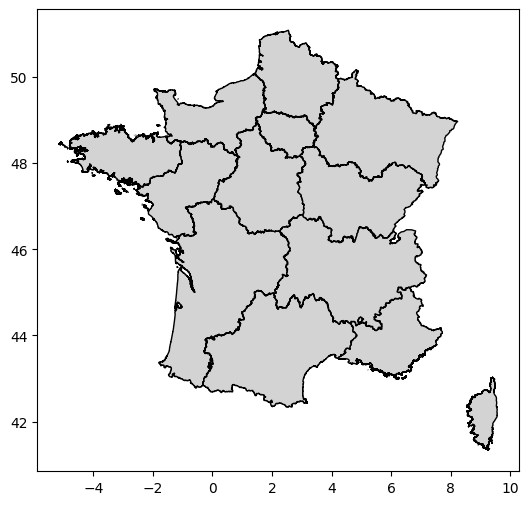

In [15]:
carte_file = 'regions-20180101.shp'
fond_de_carte = gpd.read_file(carte_file)

#convertit le fichier shp complet en un fichier sans dom tom
reg_sans_dom = region_sans_dom(fond_de_carte)

fig, ax = plt.subplots(figsize=(12, 6))
reg_sans_dom.plot(ax=ax, color='lightgray', edgecolor='black')


## Nettoyage et réparation des données


### Fichiers des festivals - colonne date de création


Nous procédons au nettoyage de la colonne 'année', qui comprend non seulement des années, mais également des dates exactes comme "2018-01-01 00:00:00" et des entrées telles que "53e" (supposément pour "53e édition"). Pour les entrées de la colonne 'année' qui sont des valeurs manquantes (NaN) ou qui présentent des formats irréguliers (comme "53e"), nous utilisons la colonne 'décennie', qui indique la décennie de création du festival. Nous choisissons aléatoirement une année au sein de cette décennie pour remplir la colonne 'année'. Lorsque cette colonne 'décennie' contient elle aussi un None, alors la valeur de la colonne "annee_de_cration' associée est égalament fixée comme None. 

Pour les fichiers shapefile et csv, le principe est le même. 

#### Réparation de la colonne "annee_de_creation_du_festival" du fichier csv des données de festival

In [16]:
col_array = np.array(df_festival['annee_de_creation_du_festival'])

# Fonction pour générer un nombre aléatoire dans la décennie
def annee_aleatoire(decennie):
    decennie_str = str(decennie)
    annees = re.findall(r'\d{4}', decennie_str)
    if annees:
        debut_decennie = int(annees[0])
        return np.random.randint(debut_decennie, debut_decennie + 10)
    else:
        return None

# Remplacer les valeurs non valides (qui ne sont pas une année ou une date) par un nombre aléatoire dans la décennie
# On essaye de balayer tous les formats possibles pour une date 
col = np.array([
    float(datetime.strptime(str(date), '%d/%m/%Y %H:%M').year)
    if re.match(r'\d{2}/\d{2}/\d{4} \d{2}:\d{2}$', str(date))
    else float(datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').year)
    if re.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$', str(date))
    else float(datetime.strptime(str(date), '%Y-%m-%d').year)
    if re.match(r'\d{4}-\d{2}-\d{2}$', str(date))
    else float(date)
    if re.match(r'\d{4}$', str(date))
    else annee_aleatoire(df_festival.at[i, 'decennie_de_creation_du_festival'])
    for i, date in enumerate(col_array)
])
df_festival['annee_creation'] = col
col_None = [x for x in col if x is not None]

print(df_festival[['annee_de_creation_du_festival', 'annee_creation']])

print("nombre de valeurs None dans la colonne année de création:", df_festival['annee_creation'].isna().sum())



     annee_de_creation_du_festival annee_creation
0                             2006         2006.0
1                             2016         2016.0
2                             2009         2009.0
3                             2002         2002.0
4                              NaN           None
...                            ...            ...
7277                           NaN           1992
7278                          2016         2016.0
7279                           NaN           2005
7280                           NaN           None
7281                          2018         2018.0

[7282 rows x 2 columns]
nombre de valeurs None dans la colonne année de création: 369


#### Réparation de la colonne "annee_de_creation_du_festival" du fichier shp des données de festival

In [17]:
shp_festi= shp_festival
print(len(shp_festi))


col_array = np.array(shp_festi['annee_de_cr'])
# Remplacer les valeurs non valides (qui ne sont pas une année ou une date) par un nombre aléatoire dans la décennie
col = np.array([
    float(datetime.strptime(str(date), '%d/%m/%Y %H:%M').year)
    if re.match(r'\d{2}/\d{2}/\d{4} \d{2}:\d{2}$', str(date))
    else float(datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').year)
    if re.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$', str(date))
    else float(datetime.strptime(str(date), '%Y-%m-%d').year)
    if re.match(r'\d{4}-\d{2}-\d{2}$', str(date))
    else float(date)
    if re.match(r'\d{4}$', str(date))
    else annee_aleatoire(df_festival.at[i, 'decennie_de_creation_du_festival'])
    for i, date in enumerate(col_array)
])
shp_festi['annee_creation'] = col
col_None = [x for x in col if x is not None]
print(shp_festi[['annee_de_cr', 'annee_creation']])

print("nombre de valeurs None dans la colonne année de création:", shp_festi['annee_creation'].isna().sum())



7282
     annee_de_cr annee_creation
0           2006         2006.0
1           2016         2016.0
2           2009         2009.0
3           2002         2002.0
4           None           None
...          ...            ...
7277        None           1991
7278        2016         2016.0
7279        None           2006
7280        None           None
7281        2018         2018.0

[7282 rows x 2 columns]
nombre de valeurs None dans la colonne année de création: 369


Pour les données en fichier shapefile, qui vont servir à produire des cartes de la France afin de visualiser les données, la présence des départements d'outre mer est superflue. En effet, lorsqu'on affiche les domtoms en plus de la métropole, le rendu devient trop petit pour être bien étudié. De plus, on peut considerer que les données concernant les domtoms sont négligeables devant celles concernant la métropole. 

On retire donc les domtoms de la base de données.

In [18]:
#On enlève les na de la colonne annee_creation
shp_festi = shp_festi.dropna(subset=['annee_creation'])

#On enlève les domtoms
shp_sans_dom = festi_sans_dom_shapefile(shp_festi)
#On convertit la colonne année de création en numéric et on drop les na de cette colonne
shp_sans_dom['annee_de_cr'] = pd.to_numeric(shp_sans_dom['annee_creation'], errors='coerce')

shp_sans_dom.head()

C:\Users\lilou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,nom_du_fest,code_postal,code_insee_,decennie_de,annee_de_cr,identifiant,geometry,annee_creation,discipline_,sous_catego
0,Gamerz,13090.0,200054807,De 2000 Ã 2009,2006.0,None,POINT (5.39857 43.53607),2006.0,"Arts visuels, arts numÃ©riques",None
1,Corsiclassic - festival de musique de chambre,20000.0,242010056,2010 et aprÃ¨s,2016.0,None,POINT (8.70132 41.93479),2016.0,Musique,None
2,Racines de ciel,20000.0,242010056,De 2000 Ã 2009,2009.0,None,POINT (8.70132 41.93479),2009.0,"Livre, littÃ©rature","Fiction (roman, thÃ©Ã¢tre, etc.), Non-fiction ..."
3,Le grand bivouac,73200.0,200068997,De 2000 Ã 2009,2002.0,None,POINT (6.40460 45.66840),2002.0,"CinÃ©ma, audiovisuel",None
5,Illustr'action,7440.0,200041366,2010 et aprÃ¨s,2014.0,None,POINT (4.73413 44.93976),2014.0,"Arts visuels, arts numÃ©riques",None


### Fichier du recensement

On a importé une base de données au niveau communal pour avoir des informations sur la population des communes dans lesquelles se déroulent le festival et plus tard espérer trouver un lien entre l'emplacement de ces derniers et leurs caractéristiques. La base est très volumineuse, on conserve et renomme seulement ses colonnes intéressantes.

On a choisi le recensement de 2019 pour ne pas biaiser nos résultats avec les conséquences du covid 19.

In [19]:
nouvelles_colonnes = {
    'Chiffres détaillés – Évolution et structure de la population': 'code_insee_commune', 
    'Unnamed: 1': 'Région',
    'Unnamed: 2': 'Département',
    'Unnamed: 3': 'Libellé géographique', 
    'Unnamed: 4': 'Population en 2019 (princ)',
    'Unnamed: 5': 'Pop 0-14 ans en 2019 (princ)',
    'Unnamed: 6': 'Pop 15-29 ans en 2019 (princ)',
    'Unnamed: 7': 'Pop 30-44 ans en 2019 (princ)',
    'Unnamed: 8': 'Pop 45-59 ans en 2019 (princ)',
    'Unnamed: 9': 'Pop 60-74 ans en 2019 (princ)', 
    'Unnamed: 10': 'Pop 75-89 ans en 2019 (princ)',
    'Unnamed: 11': 'Pop 90 ans ou plus en 2019 (princ)',  
    'Unnamed: 54': 'Pop 15 ans ou plus en 2019 (compl)',
    'Unnamed: 55': 'Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl)', 
    'Unnamed: 56': 'Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)', 
    'Unnamed: 57': 'Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)', 
    'Unnamed: 58': 'Pop 15 ans ou plus Prof. intermédiaires  en 2019 (compl)', 
    'Unnamed: 59': 'Pop 15 ans ou plus Employés en 2019 (compl)', 
    'Unnamed: 60': 'Pop 15 ans ou plus Ouvriers en 2019 (compl)', 
    'Unnamed: 61': 'Pop 15 ans ou plus Retraités en 2019 (compl)', 
    'Unnamed: 62': 'Pop 15 ans ou plus Autres en 2019 (compl)'
    }

df_csv = df_csv.rename(columns=nouvelles_colonnes)


# Épurer la base de données (conserver que les colonnes et lignes utiles, arrondir population...)

colonnes_a_conserver = ['code_insee_commune', 'Région', 'Département', 
                        'Libellé géographique', 'Population en 2019 (princ)', 
                        'Pop 0-14 ans en 2019 (princ)', 'Pop 15-29 ans en 2019 (princ)', 'Pop 30-44 ans en 2019 (princ)', 
                        'Pop 45-59 ans en 2019 (princ)', 'Pop 60-74 ans en 2019 (princ)', 'Pop 75-89 ans en 2019 (princ)', 
                        'Pop 90 ans ou plus en 2019 (princ)', 'Pop 15 ans ou plus en 2019 (compl)', 
                        'Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl)', 'Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)', 
                        'Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)', 'Pop 15 ans ou plus Prof. intermédiaires  en 2019 (compl)', 
                        'Pop 15 ans ou plus Employés en 2019 (compl)', 'Pop 15 ans ou plus Ouvriers en 2019 (compl)', 'Pop 15 ans ou plus Retraités en 2019 (compl)', 
                        'Pop 15 ans ou plus Autres en 2019 (compl)']



df_csv = df_csv[colonnes_a_conserver]

df_communes = df_csv.drop(index=[0,1,2]).reset_index(drop=True)

# Transformer en int les éléments des colonnes numériques (qui ont des types ≠)
for colonne in df_communes.columns[4:]:
    df_communes[colonne][2:] = pd.to_numeric(df_communes[colonne][2:], errors='coerce').round().astype('Int64')

df_communes.head()

,code_insee_commune,Région,Département,Libellé géographique,Population en 2019 (princ),Pop 0-14 ans en 2019 (princ),Pop 15-29 ans en 2019 (princ),Pop 30-44 ans en 2019 (princ),Pop 45-59 ans en 2019 (princ),Pop 60-74 ans en 2019 (princ),...,Pop 90 ans ou plus en 2019 (princ),Pop 15 ans ou plus en 2019 (compl),Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl),"Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)","Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)",Pop 15 ans ou plus Prof. intermédiaires en 2019 (compl),Pop 15 ans ou plus Employés en 2019 (compl),Pop 15 ans ou plus Ouvriers en 2019 (compl),Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl)
0,Code géographique,Région,Département,Libellé géographique,Population en 2019 (princ),Pop 0-14 ans en 2019 (princ),Pop 15-29 ans en 2019 (princ),Pop 30-44 ans en 2019 (princ),Pop 45-59 ans en 2019 (princ),Pop 60-74 ans en 2019 (princ),...,Pop 90 ans ou plus en 2019 (princ),Pop 15 ans ou plus en 2019 (compl),Pop 15 ans ou plus Agriculteurs exploitants en...,"Pop 15 ans ou plus Artisans, Comm., Chefs entr...","Pop 15 ans ou plus Cadres, Prof. intel. sup. e...",Pop 15 ans ou plus Prof. intermédiaires en 20...,Pop 15 ans ou plus Employés en 2019 (compl),Pop 15 ans ou plus Ouvriers en 2019 (compl),Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl)
1,CODGEO,REG,DEP,LIBGEO,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,...,P19_POP90P,C19_POP15P,C19_POP15P_CS1,C19_POP15P_CS2,C19_POP15P_CS3,C19_POP15P_CS4,C19_POP15P_CS5,C19_POP15P_CS6,C19_POP15P_CS7,C19_POP15P_CS8
2,01001,84,01,L'Abergement-Clémenciat,779,159,102,132,194,131,...,5,619,16,20,76,98,101,127,153,30
3,01002,84,01,L'Abergement-de-Varey,256,59,30,74,39,35,...,2,205,0,21,16,26,42,11,67,22
4,01004,84,01,Ambérieu-en-Bugey,14134,2642,3077,2730,2391,2054,...,195,11509,3,327,784,1890,1891,2002,2763,1848


On crée une nouvelle colonne qui nous donne la tranche d'âge majoritaire dans chaque commune, c'est un proxy de moyenne d'âge des habitants. L'âge de la population est une variable à partir de laquelle il nous semble pertinent d'étudier le lien entre les festivals et leur commune d'accueil : notre hypothèse est que si une commune est jeune, elle accueillera plus de festivals "de jeunes" (le proxy de cela sera les festivals de musique électro).
On fait en sorte de numéroter les différentes tranches d'âge afin de pouvoir les comparer entre elles plus tard.

In [20]:
tranches_age = ['Pop 0-14 ans en 2019 (princ)', 'Pop 15-29 ans en 2019 (princ)', 
                'Pop 30-44 ans en 2019 (princ)', 'Pop 45-59 ans en 2019 (princ)', 
                'Pop 60-74 ans en 2019 (princ)', 'Pop 75-89 ans en 2019 (princ)', 
                'Pop 90 ans ou plus en 2019 (princ)']

df_communes[tranches_age] = df_communes[tranches_age].apply(pd.to_numeric, errors='coerce')



tranchemax = df_communes[tranches_age].idxmax(axis=1)

tranchemax = df_communes[tranches_age].idxmax(axis=1).fillna('Nan')

df_communes['numerotation_tranche'] = tranchemax.apply(lambda x: tranches_age.index(x) if x != 'Nan' else pd.NA)

df_communes['numerotation_tranche'] = df_communes['numerotation_tranche'].astype('Int64') 

mapping_tranches_age = {
    0: '0 - Pop 0-14 ans en 2019 (princ)',
    1: '1 - Pop 15-29 ans en 2019 (princ)',
    2: '2 - Pop 30-44 ans en 2019 (princ)',
    3: '3 - Pop 45-59 ans en 2019 (princ)',
    4: '4 - Pop 60-74 ans en 2019 (princ)',
    5: '5 - Pop 75-89 ans en 2019 (princ)',
    6: '6 - Pop 90 ans ou plus en 2019 (princ)'
}

df_communes['tranche_age_majoritaire'] = (
    df_communes['numerotation_tranche'].map(mapping_tranches_age).astype(str) 
)



C:\Users\lilou\AppData\Local\Temp\ipykernel_4368\3350751876.py:10: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  tranchemax = df_communes[tranches_age].idxmax(axis=1)
C:\Users\lilou\AppData\Local\Temp\ipykernel_4368\3350751876.py:12: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  tranchemax = df_communes[tranches_age].idxmax(axis=1).fillna('Nan')


De la même manière, on crée une colonne de PCS "moyenne" (la PCS avec la plus grande part de population). On met les PCS dans un ordre qui pourrait être considéré comme un ordre croissant du capital culturel et économique que possèdent les membres de ces PCS. 

In [21]:
# Pareil avec les PCS 
PCS = ['Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl)', 'Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)', 
                'Pop 15 ans ou plus Ouvriers en 2019 (compl)', 'Pop 15 ans ou plus Employés en 2019 (compl)',
                'Pop 15 ans ou plus Prof. intermédiaires  en 2019 (compl)', 'Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)']
# On laisse délibéremment de côté retraités et autres 

df_communes[PCS] = df_communes[PCS].apply(pd.to_numeric, errors='coerce')


PCSmax = df_communes[PCS].idxmax(axis=1)

PCSmax = df_communes[PCS].idxmax(axis=1).fillna('Nan')

df_communes['numerotation_PCS'] = PCSmax.apply(lambda x: PCS.index(x) if x != 'Nan' else pd.NA)

df_communes['numerotation_PCS'] = df_communes['numerotation_PCS'].astype('Int64') 

mapping_PCS = {
    0: '0 - Agriculteurs',
    1: '1 - ACCE (Artisans...)',
    2: '2 - Ouvriers',
    3: '3 - Employés',
    4: '4 - Prof. Intermédiaires',
    5: '5 - Cadres',
}

df_communes['PCS_maj'] = (
    df_communes['numerotation_PCS'].map(mapping_PCS).astype(str) 
)


df_communes.head()

C:\Users\lilou\AppData\Local\Temp\ipykernel_4368\2609476832.py:10: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  PCSmax = df_communes[PCS].idxmax(axis=1)
C:\Users\lilou\AppData\Local\Temp\ipykernel_4368\2609476832.py:12: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  PCSmax = df_communes[PCS].idxmax(axis=1).fillna('Nan')


,code_insee_commune,Région,Département,Libellé géographique,Population en 2019 (princ),Pop 0-14 ans en 2019 (princ),Pop 15-29 ans en 2019 (princ),Pop 30-44 ans en 2019 (princ),Pop 45-59 ans en 2019 (princ),Pop 60-74 ans en 2019 (princ),...,"Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)",Pop 15 ans ou plus Prof. intermédiaires en 2019 (compl),Pop 15 ans ou plus Employés en 2019 (compl),Pop 15 ans ou plus Ouvriers en 2019 (compl),Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl),numerotation_tranche,tranche_age_majoritaire,numerotation_PCS,PCS_maj
0,Code géographique,Région,Département,Libellé géographique,Population en 2019 (princ),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl),<NA>,nan,<NA>,nan
1,CODGEO,REG,DEP,LIBGEO,P19_POP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,C19_POP15P_CS7,C19_POP15P_CS8,<NA>,nan,<NA>,nan
2,01001,84,01,L'Abergement-Clémenciat,779,159.0,102.0,132.0,194.0,131.0,...,76.0,98.0,101.0,127.0,153,30,3,3 - Pop 45-59 ans en 2019 (princ),2,2 - Ouvriers
3,01002,84,01,L'Abergement-de-Varey,256,59.0,30.0,74.0,39.0,35.0,...,16.0,26.0,42.0,11.0,67,22,2,2 - Pop 30-44 ans en 2019 (princ),3,3 - Employés
4,01004,84,01,Ambérieu-en-Bugey,14134,2642.0,3077.0,2730.0,2391.0,2054.0,...,784.0,1890.0,1891.0,2002.0,2763,1848,1,1 - Pop 15-29 ans en 2019 (princ),2,2 - Ouvriers


### Fusion des bases de données des festival (csv) et du recensement

On fusionne le dataframe des festivals et celui des communes pour pouvoir faire des statistiques descriptives sur un seul et même dataframe.

In [22]:
# Fusionner les DataFrames sur la colonne 'Code commune'
df_merged = pd.merge(df_festival, df_communes, on='code_insee_commune', how='left')

# Afficher les premières lignes du DataFrame résultant
df_merged.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_postal_de_la_commune_principale_de_deroulement,code_insee_commune,code_insee_epci_collage_en_valeur,libelle_epci_collage_en_valeur,numero_de_voie,...,"Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)",Pop 15 ans ou plus Prof. intermédiaires en 2019 (compl),Pop 15 ans ou plus Employés en 2019 (compl),Pop 15 ans ou plus Ouvriers en 2019 (compl),Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl),numerotation_tranche,tranche_age_majoritaire,numerotation_PCS,PCS_maj
0,Gamerz,Départementale,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,Aix-en-Provence,13090,13001,200054807,Métropole d'Aix-Marseille-Provence,1,...,20110.0,18211.0,17305.0,7646.0,27613,30044,1,1 - Pop 15-29 ans en 2019 (princ),5,5 - Cadres
1,Corsiclassic - festival de musique de chambre,NaN,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,NaN,...,3457.0,7751.0,12040.0,6488.0,15565,11656,2,2 - Pop 30-44 ans en 2019 (princ),3,3 - Employés
2,Racines de ciel,NaN,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,50-52,...,3457.0,7751.0,12040.0,6488.0,15565,11656,2,2 - Pop 30-44 ans en 2019 (princ),3,3 - Employés
3,Le grand bivouac,Intercommunale,Auvergne-Rhône-Alpes,Savoie,Albertville,73200,73011,200068997,CA Arlysère,88 bis,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN
4,Festival Acthea,NaN,Occitanie,Tarn,Albi,81000,81004,248100737,CA de l'Albigeois (C2A),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN


# PARTIE 2 - ANALYSE DESCRIPTIVE ET REPRESENTATION GRAPHIQUE


## Etude de la popultion des communes


On observe dans un premier temps les caractéristiques des communes. Les résultats dans le cas de l'étude la PCS donnent le nombre de communes avec telle PCS comme PCS mojoritaire. Par exemple, 2140 communes présentent les employés comme PCS mojoritaire. C'est le même principe avec la tranche d'âge majoritaire: 1234 communes présentent en mojorité une populaton d'un âge moyen de 45-59 ans en 2019. 

In [23]:
# Tableau de fréquence des PCS majoritaires (nmb de communes avec telle PCS comme majoritaire)

print(df_merged['PCS_maj'].value_counts())

PCS_maj
3 - Employés                2140
4 - Prof. Intermédiaires     507
2 - Ouvriers                 460
5 - Cadres                   390
1 - ACCE (Artisans...)        20
0 - Agriculteurs              14
Name: count, dtype: int64


In [24]:
print(df_merged['tranche_age_majoritaire'].value_counts())

tranche_age_majoritaire
3 - Pop 45-59 ans en 2019 (princ)    1234
4 - Pop 60-74 ans en 2019 (princ)     943
1 - Pop 15-29 ans en 2019 (princ)     936
0 - Pop 0-14 ans en 2019 (princ)      207
2 - Pop 30-44 ans en 2019 (princ)     205
5 - Pop 75-89 ans en 2019 (princ)       6
Name: count, dtype: int64


## Etude des différents festivals

On étudie à présent les données liées aux festivals. 

### Dates de création

In [ ]:
print(sorted(df_festival['discipline_dominante']))


On observe que les trois premiers festivals ont été créés en X,X et X. Pour des raisons de visibilité, nous allons commencer par étudier la distribution de création des festivals à partir de 1900.

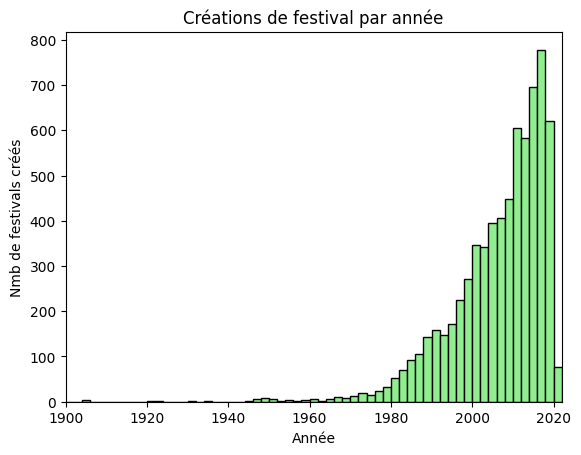

In [25]:
#On fait un histogramme de la création des festivals par année 

plt.hist(col_None, bins=np.arange(1900, max(col_None) + 2, 2), color='lightgreen', edgecolor='black')
plt.xlabel('Année')
plt.ylabel('Nmb de festivals créés')
plt.title('Créations de festival par année')
plt.xlim(1900, max(col_None))
plt.show()

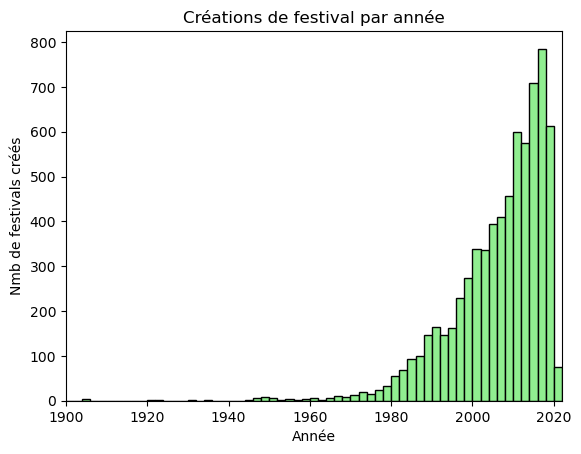

On observe que globalement, peu de festivals ont été créés avant les années 80. Ensuite, la création de festivals devient de plus en plus importante, jusqu'à atteindre un pic en 2018 et 2019. Enfin, on observe une forte baisse en 2020 et 2021, que l'on peut apparenter aux conséquences du corornavirus. 

### Types de festivals

In [26]:
print(df_festival['discipline_dominante'].value_counts())

discipline_dominante
Musique                          3228
Spectacle vivant                 1633
Livre, littérature                892
Cinéma, audiovisuel               685
Pluridisciplinaire                462
Arts visuels, arts numériques     382
Name: count, dtype: int64


On observe que la majorité des festivals (3228) ont pour discipline majoritaire la musique. 

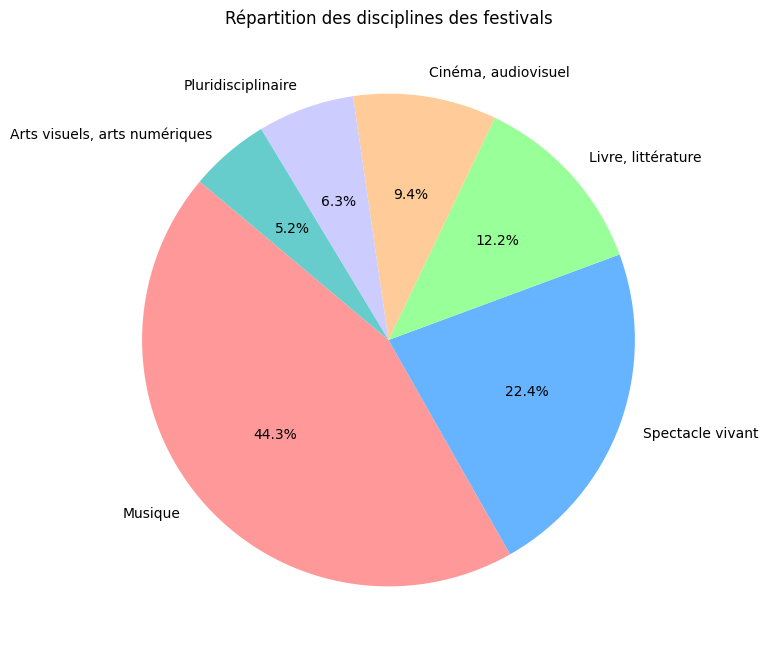

In [27]:
discipline_dom = df_festival['discipline_dominante'].value_counts()

plt.figure(figsize=(8,8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#CCCCFF', '#66CCCC']
plt.pie(discipline_dom, labels= discipline_dom.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des disciplines des festivals')
plt.show()

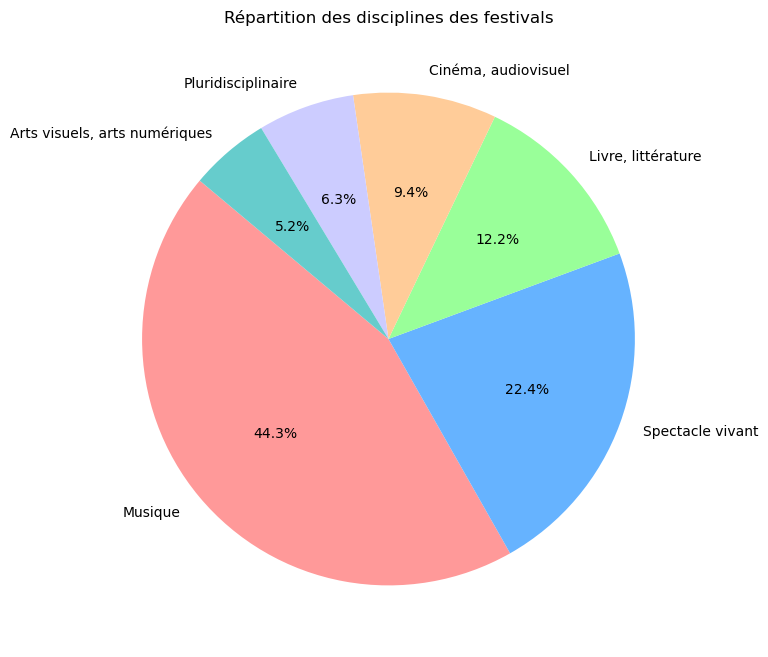

La majorité des festivals sont des festivals de musique.
Concentrons-nous sur la colonne sous catégorie de musique cnm qui donne, pour chaque de festival de musique, son "sous-style" défini selon les libéllés du Conservatoire National de Musique. 

Les catégories flous (musiques sans distinction esthétique, pluridisciplinaire) ou celles qui sont à la marge de la discipline (humour, comédie musicale...) sont placées dans autres pour clarifier la lecture des statistiques descriptives en conservant le même niveau de pertinence.

In [28]:
mapping_sous_mus = {
    '1- Chanson' : 'Chanson',
    '02- Musiques amplifiées ou électroniques' : 'Électro',
    '03- Jazz, blues et musiques improvisées' : 'Jazz, blues',
    '04- Musiques traditionnelles et du monde' : 'Musique du monde',
    '05- Humour': 'Autres',
    '07- Musiques actuelles sans distinction': 'Musiques actuelles',
    '08- Musiques (sans distinction esthétique)' : 'Sans sous catégorie',
    '09- Pluridisciplinaire': 'Pluridisciplinaire',
    '10- Comédie musicale': 'Autres',
    '11- Musique classique, lyrique, contemporaine, autres': 'Musique classique',
    '13- Autres spectacles (théâtre, arts de la rue et du cirque...)': 'Autres',
    '14- Autres disciplines culturelles (arts plastiques, cinéma, photographie, livre...)': 'Autres',
    '15- Fête de la ville, feria, fête votive, fête de la pomme, etc.': 'Fêtes de villes ou villages'
}


Nombre de valeurs non-NaN dans 'sous_categorie_musique_cnm': 958


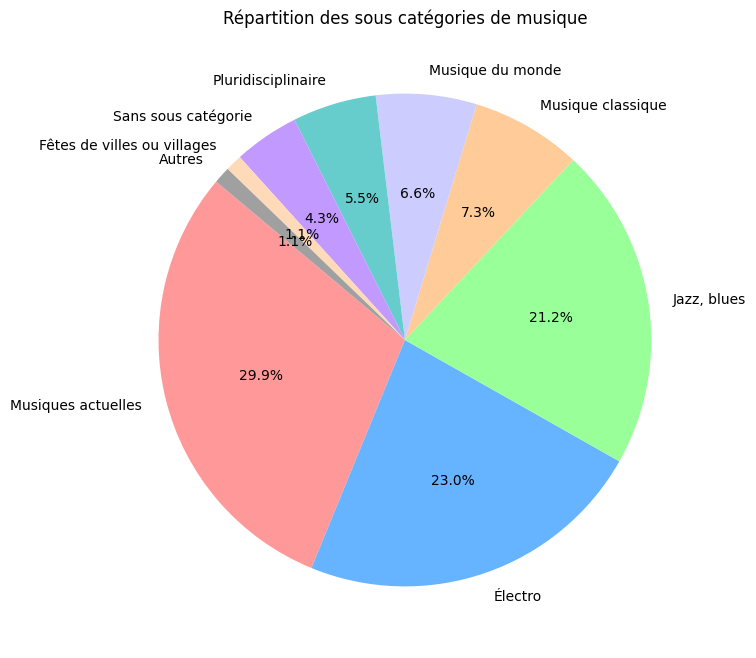

In [29]:
musique_dom = df_festival['sous_categorie_musique_cnm'].map(mapping_sous_mus).value_counts()

nombre_non_nan = df_festival['sous_categorie_musique_cnm'].notna().sum()
print(f"Nombre de valeurs non-NaN dans 'sous_categorie_musique_cnm': {nombre_non_nan}")

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#CCCCFF', 
          '#66CCCC', '#c299ff', '#FFDAB9', '#A0A0A0']
plt.figure(figsize=(8,8))
plt.pie(musique_dom, colors=colors, labels= musique_dom.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des sous catégories de musique')
plt.show()

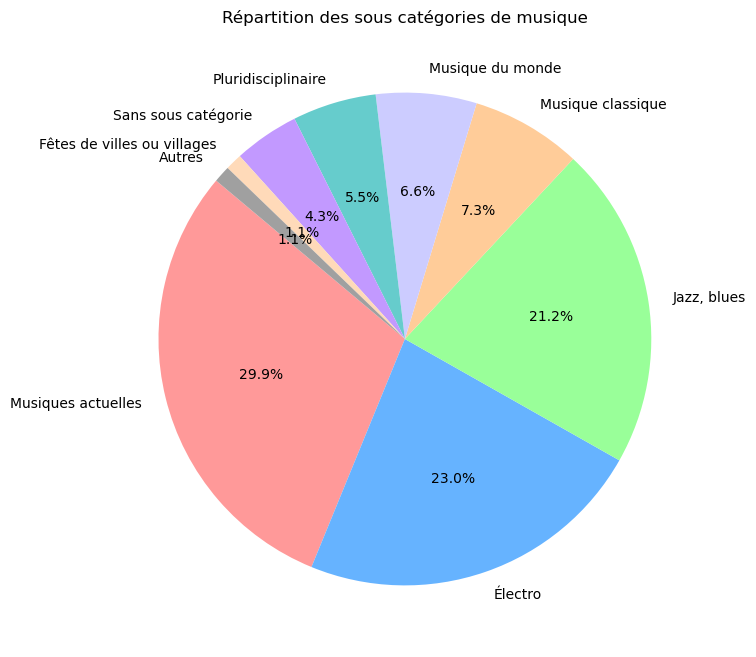

On observe donc que le genre le plus représenté dans les festivals de musique est le genre de musique actuelle (29,9 %), suivi de près par la musique électronique (23 %) et le jazz/blues (21,2 %)

## Lien entre l'âge de la commune d'accueil et le type de musique des festivals

On cherche à comparer la tranche d'âge majoritaire dans les communes accueillant un festival de musique classique et celle dans les communes accueillant un festival de musique électro. 

In [30]:
festivals_musique_classique = df_merged[df_merged['sous_categorie_musique_cnm'] == '11- Musique classique, lyrique, contemporaine, autres']
festivals_electro = df_merged[df_merged['sous_categorie_musique_cnm'] == '02- Musiques amplifiées ou électroniques']


print(df_merged['tranche_age_majoritaire'].value_counts())
print(festivals_musique_classique['tranche_age_majoritaire'].value_counts())
print(festivals_electro['tranche_age_majoritaire'].value_counts())

tranche_age_majoritaire
3 - Pop 45-59 ans en 2019 (princ)    1234
4 - Pop 60-74 ans en 2019 (princ)     943
1 - Pop 15-29 ans en 2019 (princ)     936
0 - Pop 0-14 ans en 2019 (princ)      207
2 - Pop 30-44 ans en 2019 (princ)     205
5 - Pop 75-89 ans en 2019 (princ)       6
Name: count, dtype: int64
tranche_age_majoritaire
4 - Pop 60-74 ans en 2019 (princ)    14
1 - Pop 15-29 ans en 2019 (princ)    12
3 - Pop 45-59 ans en 2019 (princ)     8
2 - Pop 30-44 ans en 2019 (princ)     1
0 - Pop 0-14 ans en 2019 (princ)      1
Name: count, dtype: int64
tranche_age_majoritaire
1 - Pop 15-29 ans en 2019 (princ)    32
3 - Pop 45-59 ans en 2019 (princ)    28
4 - Pop 60-74 ans en 2019 (princ)    22
0 - Pop 0-14 ans en 2019 (princ)      7
2 - Pop 30-44 ans en 2019 (princ)     3
5 - Pop 75-89 ans en 2019 (princ)     1
Name: count, dtype: int64


On constate que la tranche d'âge prédominante dans la plupart des communes est celle de 45 à 59 ans. 

Les festivals de musique classique se situent principalement dans des communes où, en moyenne, la population majoritaire est plus âgée (60 à 74 ans). Pour ce qui est des communes accueillant des événements de musique électronique, la tranche d'âge prépondérante est de 15 à 29 ans. Il est cependant important de noter que ces tendances s'observent avec une différence légère, ne concernant que 2 à 4 communes en termes d'effectif.

De la même manière, on regarde en fonctions des PCS. ON affiche successivement les PCS majoritaires, les PCS majoritaires des communes acceuillant les festivals de musique classique et enfin les PCS majoritaires des communes acceuillant les festivals de musique éléctro. 

In [31]:
print(df_merged['PCS_maj'].value_counts())
print(festivals_musique_classique['PCS_maj'].value_counts())
print(festivals_electro['PCS_maj'].value_counts())

PCS_maj
3 - Employés                2140
4 - Prof. Intermédiaires     507
2 - Ouvriers                 460
5 - Cadres                   390
1 - ACCE (Artisans...)        20
0 - Agriculteurs              14
Name: count, dtype: int64
PCS_maj
3 - Employés                23
5 - Cadres                   5
2 - Ouvriers                 5
4 - Prof. Intermédiaires     3
Name: count, dtype: int64
PCS_maj
3 - Employés                50
2 - Ouvriers                18
4 - Prof. Intermédiaires    15
5 - Cadres                  10
Name: count, dtype: int64


Les résultats obtenus doivent être interprétés avec prudence, étant donné que les effectifs sont considérablement réduits lorsque l'on examine uniquement un type de musique, rendant difficile l'établissement de conclusions robustes.

Il est à noter qu'un rapport d'environ 1/5 existe entre le nombre de communes où la catégorie socioprofessionnelle (PCS) majoritaire est constituée de cadres et celles où elle est constituée d'employés, quel que soit le type de musique. Si on reformule, le nombre de communes où la PCS majoritaire est composée de cadres est cinq fois inférieur au nombre de celles où la PCF majoritaire est composée d'employés.Le principal résultat réside dans le fait que, pour les festivals de musique électronique, le rapport entre les communes à dominante ouvrière et celles à dominante employée est d'environ 1/3 (trois fois moins de communes à PCF dominante ouvriers que de communes à PCF dominante employés). Ce constat diffère des festivals de musique classique et des festivals de manière générale, où le rapport demeure à 1/5.

## Emplacement des festivals - observation visuelle

On cherche maintenant à observer la localisation des festivals dans l'espace. On observe dans un premier temps les région principales de déroulement des festivals.

In [32]:
print(df_merged['region_principale_de_deroulement'].value_counts())

region_principale_de_deroulement
Auvergne-Rhône-Alpes          947
Provence-Alpes-Côte d'Azur    942
Occitanie                     903
Nouvelle-Aquitaine            828
Île-de-France                 654
Bretagne                      590
Grand Est                     468
Bourgogne-Franche-Comté       442
Centre-Val de Loire           357
Hauts-de-France               338
Pays de la Loire              332
Normandie                     267
Corse                          69
Guadeloupe                     44
La Réunion                     41
Guyane                         19
Martinique                     15
Mayotte                         9
Polynésie française             7
Nouvelle-Calédonie              5
Saint-Barthélemy                3
Saint-Pierre-et-Miquelon        2
Name: count, dtype: int64


 On peut voir que la région dans laquelle se déroulent le plus de festivals est la région Auvergne-Rhône-Alpes, suivi de près par la région Provence-Alpes-Côte d'Azur. 
 
On cherche maintenant à observer la distribution géographique des festivals sur une carte de la France métropolitaine. 

### Carte des festivals en France, toutes disciplines confondues

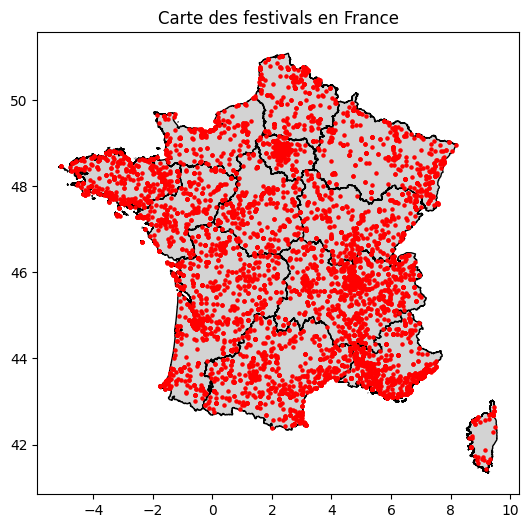

In [33]:
fond_de_carte = lecture_fichier("carte_region", "shp")
reg_sans_dom = region_sans_dom(fond_de_carte)


#on print la carte de tous les festivals
carte_fest(shp_sans_dom, reg_sans_dom, 'Carte des festivals en France')

On voit que des zones sont plus densément peuplées de festivals que d'autres: la région parisienne, la côte sud de la bretagne, les alentours de Lyon et selon une ligne qui sembe s'étirer de Lyon jusqu'à Marseille et s'élargit à toute la côte d'Azur. 

Cela rejoint nos résultats précédents des régions contenant le plus de déroulements de festivals.

### Carte des festivals en France par discipline principale

On affiche les cartes des emplacements des festivals selon leur discipline dominante, parmi Musique, Arts visuels et numériques, Cinéma et audiovisuel, Spectacle vivant, Livre et littérature et Pluridiscipinaire.

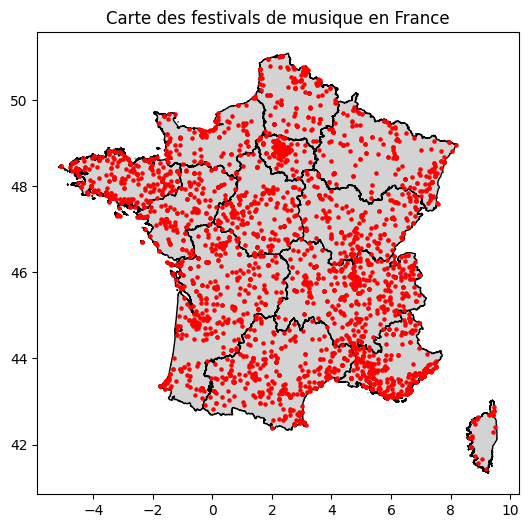

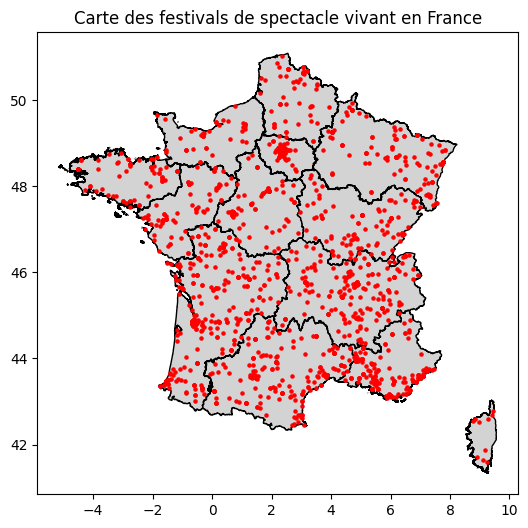

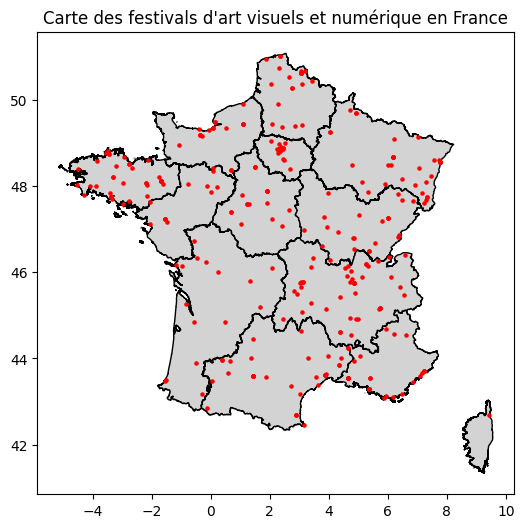

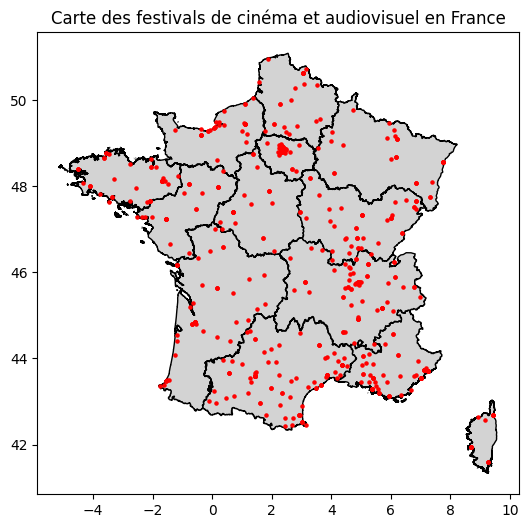

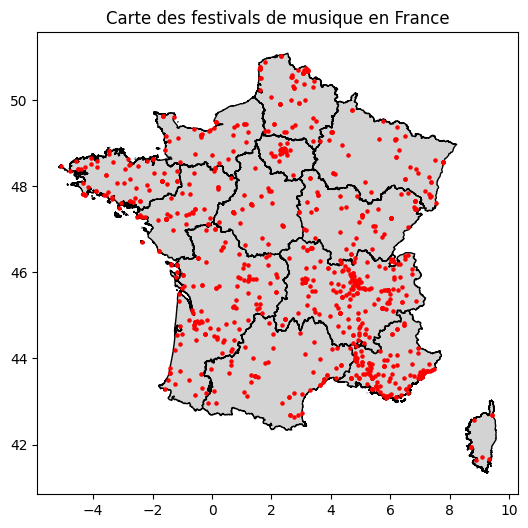

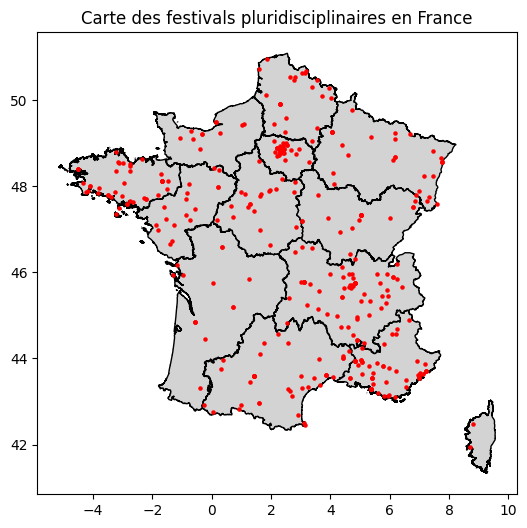

In [34]:
fest_musique = shp_sans_dom[shp_sans_dom['discipline_'] == 'Musique']
carte_fest(fest_musique, reg_sans_dom, "Carte des festivals de musique en France")

fest_spectacle = shp_sans_dom[shp_sans_dom['discipline_'] == 'Spectacle vivant']
carte_fest(fest_spectacle, reg_sans_dom, "Carte des festivals de spectacle vivant en France")

fest_art_visu = shp_sans_dom[shp_sans_dom['discipline_'] == 'Arts visuels, arts numÃ©riques']
carte_fest(fest_art_visu, reg_sans_dom, "Carte des festivals d'art visuels et numérique en France")

fest_art_num = shp_sans_dom[shp_sans_dom['discipline_'] == 'CinÃ©ma, audiovisuel']
carte_fest(fest_art_num, reg_sans_dom, "Carte des festivals de cinéma et audiovisuel en France")

fest_livre = shp_sans_dom[shp_sans_dom['discipline_'] == 'Livre, littÃ©rature']
carte_fest(fest_livre, reg_sans_dom, "Carte des festivals de musique en France")

fest_pluri = shp_sans_dom[shp_sans_dom['discipline_'] == 'Pluridisciplinaire']
carte_fest(fest_pluri, reg_sans_dom, "Carte des festivals pluridisciplinaires en France")


Il semble que la distribution varie peu selon la discipline du festival. Les zones qui présentaient une forte concentration de festivals toutes disciplines confondus sont également celles qui sont les plus représentées lorsqu'on affiche les festivals d'une seule discipline. 

# PARTIE 3 - MODELISATION


## Modélisation des emplacements des festivals créés en fonction du temps



On opte pour la modélisation de la création des festivals en fonction du temps, privilégiant une approche visuelle. Pour ce faire, nous envisageons la création d'un GIF qui illustre les festivals créés chaque année ainsi que leur emplacement en France métropolitaine, à raison de deux années par seconde. Dans une première étape, nous avons élaboré une fonction qui affiche une carte des festivals créés au cours d'une année donnée. Cette fonction nous permettra ultérieurement de générer un film d'animation en combinant l'ensemble de ces cartes.

In [35]:
def carte_1_an(emplacements_festivals, fond_de_carte, annee):

    # On enlève les lignes dont la date de création est différente de celle donnée en argument
    emplacements_festivals = emplacements_festivals[emplacements_festivals['annee_creation'] == annee]

    if not emplacements_festivals.empty:
        fig, ax = plt.subplots(figsize=(12, 6))

        # Afficher le fond de carte
        fond_de_carte.plot(ax=ax, color='lightgray', edgecolor='black')

        # Afficher les emplacements des festivals
        emplacements_festivals.plot(ax=ax, color='red', marker='o', markersize=5)

        # Ajouter un titre à la carte
        plt.title(f'Carte des festivals créés en {annee}')

        # Afficher la carte
        plt.show()

        return

    # Si aucun festival n'a été créé cette année, afficher seulement le fond de carte
    fig, ax = plt.subplots(figsize=(12, 6))
    fond_de_carte.plot(ax=ax, color='lightgray', edgecolor='black')
    plt.title(f'Aucun festival créé en France en {annee}')
    plt.show()
    return

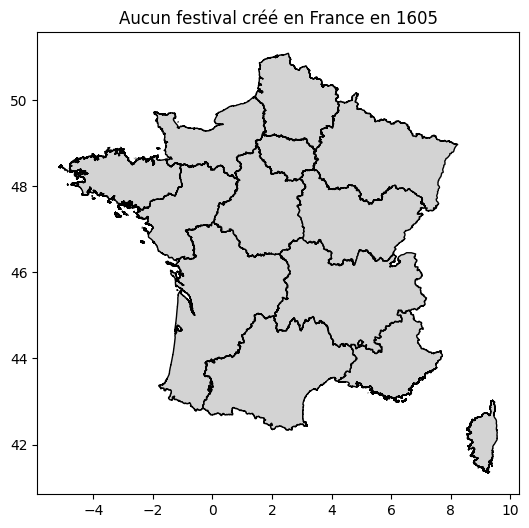

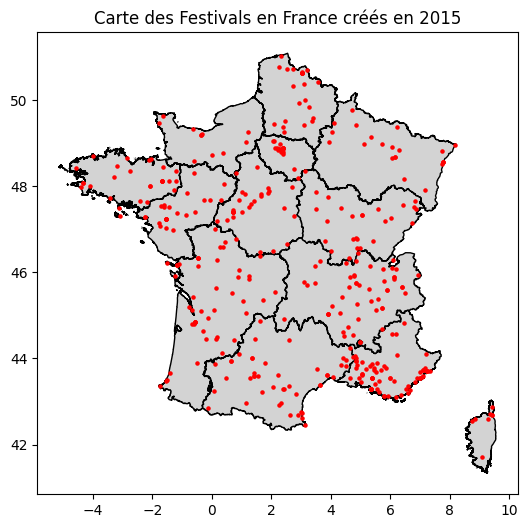

In [36]:
carte_1_an(shp_sans_dom, reg_sans_dom, 1605)
carte_1_an(shp_sans_dom, reg_sans_dom, 2015)

Dans le but de créer notre animation, nous optimisons la création du fond de carte ainsi que la fonction de création de carte. En effet, la fonction d'animation risque de prendre beaucoup de temps ; par conséquent, nous limitons les opérations répétées dans les fonctions qui pourraient être évitées et effectuées qu'une seule fois.

In [37]:
#Génere le fond de carte tout seul
def make_fond_carte(fond_de_carte):
    # défini la figure
    fig, ax = plt.subplots(figsize=(12, 6))
    # plot le fonde de carte de la France
    fond_de_carte.plot(ax=ax, color='lightgray', edgecolor='black')
    return ax


#Génere une carte de la france avec les emplacements des festivals 
#Cette fonction marche si on a déja converti les valeurs en numérique et remplacé toutes les valeurs qui ne sont pas numériques par des NaN
def carte(emplacements_festivals, ax, annee):
    # On enlève les lignes dont la date de création est différente de celle donnée en argument
    emplacements = emplacements_festivals[emplacements_festivals['annee_creation'] == annee]

    if not emplacements.empty:
        # On affiche les emplacements des festivals
        layer = emplacements.plot(ax=ax, color='red', marker='o', markersize=5)

        return layer

    return ax

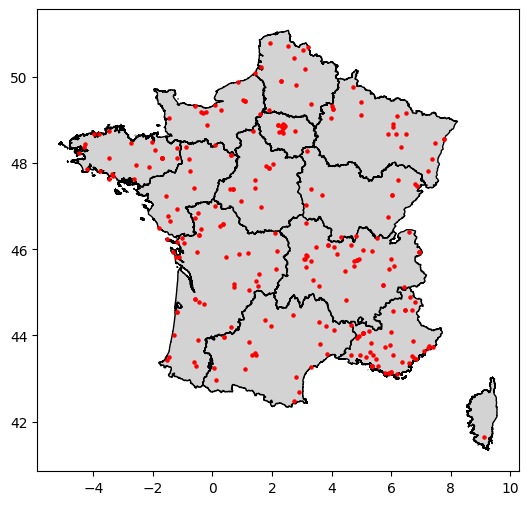

In [38]:
ax = make_fond_carte(reg_sans_dom)
layer = carte(shp_sans_dom, ax, 2010)

On définit l'année de début et de fin de l'animation. 

In [39]:
annee_min = shp_sans_dom['annee_de_cr'].min()
annee_max = shp_sans_dom['annee_de_cr'].max()

print("annee_min=", annee_min)
print("annee_max=", annee_max)

print(sorted(shp_sans_dom['annee_creation']))


annee_min= 1604.0
annee_max= 2022.0
[1604.0, 1869.0, 1874.0, 1905.0, 1905.0, 1920.0, 1923.0, 1930.0, 1934.0, 1935.0, 1944.0, 1946.0, 1946.0, 1946.0, 1946.0, 1947.0, 1947.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1948.0, 1949.0, 1950.0, 1950.0, 1950.0, 1951.0, 1951.0, 1952.0, 1952.0, 1954.0, 1954.0, 1954.0, 1956.0, 1957.0, 1958.0, 1958.0, 1958.0, 1959.0, 1960.0, 1960.0, 1960.0, 1960.0, 1960.0, 1961.0, 1961.0, 1962.0, 1962.0, 1964.0, 1964.0, 1964.0, 1965.0, 1965.0, 1966.0, 1966.0, 1966.0, 1966.0, 1966.0, 1966.0, 1966.0, 1967.0, 1967.0, 1967.0, 1967.0, 1968.0, 1968.0, 1968.0, 1968.0, 1968.0, 1968.0, 1969.0, 1969.0, 1969.0, 1970.0, 1970.0, 1970.0, 1970.0, 1970.0, 1971.0, 1971.0, 1971.0, 1971.0, 1971.0, 1971.0, 1971.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1972.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1973.0, 1974.0, 1974.0, 1974.0, 1974.0, 1974.0, 1974.0, 1975.0, 1975.0, 1975.0, 1975.0, 1975.0, 1975.0, 197

On voit que le premier festival de notre base de données a été créé en 1604. Le suivant a été créé en 1869 et celui d'après encore en 1874, et le prochain encore en 1905. Comme la création de l'animation prend beaucoup de temps, on va négliger la modélisation des trois premiers festivals et commencer notre modélisation en 1904.

On crée le code qui va générer l'animation. **Attention, le prochain bloc de code met 2h30 à s'exécuter.**

 Les résultats du GIF complet sont présentés à la suite du code.

In [42]:
# Définir le nombre total d'années pour l'animation
annee_min = 1903
annee_max = 2023

total_years = annee_max - annee_min + 1
print("total_years=", total_years)


#On importe le fond de carte de la France
ax = make_fond_carte(reg_sans_dom)

#On initialise la figure
fig, ax = plt.subplots(figsize=(8, 6))
reg_sans_dom.boundary.plot(ax=ax)

def update(frame):
    #ax.clear()
    reg_sans_dom.boundary.plot(ax=ax)
    print("annee", annee_min + frame)
    
    # Appeler votre fonction existante pour afficher la carte pour une année spécifique
    layer = carte(shp_sans_dom, ax, annee_min + frame)
    print("...")
    ax.set_title(f'Année {annee_min + frame}')
    return [layer]
    #ax.set_aspect('equal')


# Création de l'animation
anim = FuncAnimation(fig, update, frames=total_years, repeat=False)

writer = PillowWriter(fps=2)
anim.save("Modélisation_creation_festival_en_France_1904-2022.gif", writer=writer)

total_years= 121
annee 1903
...
annee 1903
...
annee 1904
...
annee 1905
...
annee 1906
...
annee 1907
...
annee 1908
...
annee 1909
...
annee 1910
...
annee 1911
...
annee 1912
...
annee 1913
...
annee 1914
...
annee 1915
...
annee 1916
...
annee 1917
...
annee 1918
...
annee 1919
...
annee 1920
...
annee 1921
...
annee 1922
...
annee 1923
...
annee 1924
...
annee 1925
...
annee 1926
...
annee 1927
...
annee 1928
...
annee 1929
...
annee 1930
...
annee 1931
...
annee 1932
...
annee 1933
...
annee 1934
...
annee 1935
...
annee 1936
...
annee 1937
...
annee 1938
...
annee 1939
...
annee 1940
...
annee 1941
...
annee 1942
...
annee 1943
...
annee 1944
...
annee 1945
...
annee 1946
...
annee 1947
...
annee 1948
...
annee 1949
...
annee 1950
...
annee 1951
...
annee 1952
...
annee 1953
...
annee 1954
...
annee 1955
...
annee 1956
...
annee 1957
...
annee 1958
...
annee 1959
...
annee 1960
...
annee 1961
...
annee 1962
...
annee 1963
...
annee 1964
...
annee 1965
...
annee 1966
...
annee 19

Le résultat du code ci-dessous donne l'animation ci-dessous

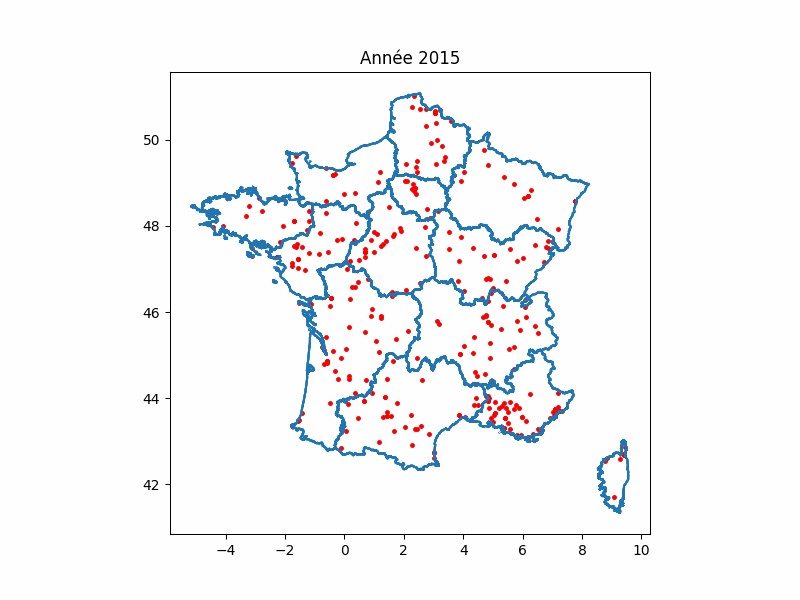

In [4]:
from IPython.display import display, Image


#On creer une fonction qui permet de lire des gifs en fonction d'un nom de fichier.
def lire_gif(nom_fichier):
    # Créer le chemin complet du fichier
    chemin_fichier = nom_fichier

    # Afficher le GIF dans le notebook
    with open(chemin_fichier, "rb") as f:
        image = Image(data=f.read(), format="png")
        display(image)

# Exemple d'utilisation : Remplacez "votre_gif.gif" par le nom de votre fichier GIF
lire_gif("test_avec_titre.gif")


Pour avoir un apercu de la fonction, voici le code qui tourne sur cinq ans. 

In [ ]:
# Définir le nombre total d'années pour l'animation
annee_min = 2015
annee_max = 2020

total_years = annee_max - annee_min + 1
print("total_years=", total_years)


#On importe le fond de carte de la France
ax = make_fond_carte(reg_sans_dom)

#On initialise la figure
fig, ax = plt.subplots(figsize=(8, 6))
reg_sans_dom.boundary.plot(ax=ax)

def update(frame):
    #ax.clear()
    reg_sans_dom.boundary.plot(ax=ax)
    print("annee", annee_min + frame)
    
    # Appeler votre fonction existante pour afficher la carte pour une année spécifique
    layer = carte(shp_sans_dom, ax, annee_min + frame)
    print("...")
    ax.set_title(f'Année {annee_min + frame}')
    return [layer]
    #ax.set_aspect('equal')


# Création de l'animation
anim = FuncAnimation(fig, update, frames=total_years, repeat=False)

writer = PillowWriter(fps=2)
anim.save("Modélisation_carte_2015-2020.gif", writer=writer)

lire_gif("Modélisation_carte_2015-2020.gif".gif")


## Régressions logistiques multinomiales 

On tente d'estimer la discipline dominante du festival en fonction de 1) l'âge moyen de la commune 2) la PCS "moyenne" de la commune

### Discipline dominante en fonction de l'âge moyen de la commune

In [32]:
# I. Première reg

# Exclure les lignes avec des valeurs manquantes dans 'tranche_age_majoritaire'
data_filtered = df_merged.dropna(subset=['numerotation_tranche'])

data_filtered['numerotation_tranche'] = data_filtered['numerotation_tranche'].astype('int64')
data_filtered['discipline_dominante'].head()


"""On échange l'ordre du mapping original dans lequel la valeur 0 était arts visuels et on la remplace par pluridisciplinaire 
car il est plus pertinent de regarder la probabilité qu'un festival soit de tel type plutôt que pluridisciplinaire au lieu de regarder s'il est 
de tel type plutôt que d'arts visuels"""

cat_order = ['Pluridisciplinaire', 'Arts visuels, arts numériques', 'Cinéma, audiovisuel', 
             'Livre, littérature', 'Musique', 'Spectacle vivant']
data_filtered['discipline_dominante'] = pd.Categorical(data_filtered['discipline_dominante'], 
                                                       categories=cat_order, 
                                                       ordered=True)

data_filtered['discipline_dominante'] = pd.Categorical(data_filtered['discipline_dominante']).codes

# Obtenir le mappage entre catégories et codes
mapping = {code: cat for code, cat in enumerate(cat_order)}
print("Le mappage des catégories est le suivant :", mapping, "c'est grâce à cela que l'on peut lire le tableau de la régression")

data_filtered['discipline_dominante'].head()

# Modèle de régression logistique multinomiale
model_filtered = smf.mnlogit(f'discipline_dominante ~ numerotation_tranche', data=data_filtered)  # Ajoutez une constante (intercept) aux données

results_filtered = model_filtered.fit()

# Tableau récapitulatif des résultats
summary_filtered = results_filtered.summary()
print(summary_filtered)



/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_73144/1266893295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['numerotation_tranche'] = data_filtered['numerotation_tranche'].astype('int64')
/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_73144/1266893295.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['discipline_dominante'] = pd.Categorical(data_filtered['discipline_dominante'],
/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_73144/12

Le mappage des catégories est le suivant : {0: 'Pluridisciplinaire', 1: 'Arts visuels, arts numériques', 2: 'Cinéma, audiovisuel', 3: 'Livre, littérature', 4: 'Musique', 5: 'Spectacle vivant'} c'est grâce à cela que l'on peut lire le tableau de la régression
Optimization terminated successfully.
         Current function value: 1.484205
         Iterations 6
                           MNLogit Regression Results                           
Dep. Variable:     discipline_dominante   No. Observations:                 3531
Model:                          MNLogit   Df Residuals:                     3521
Method:                             MLE   Df Model:                            5
Date:                  Sat, 30 Dec 2023   Pseudo R-squ.:                0.006149
Time:                          11:10:39   Log-Likelihood:                -5240.7
converged:                         True   LL-Null:                       -5273.2
Covariance Type:              nonrobust   LLR p-value:                 1

Étant données les p-valeurs observées, nos résultats ne sont pas très significatifs. Cependant, nous constatons tout de même que pour les arts visuels et le cinéma, plus la population d'une commune est vieille, moins elle a de chance d'accueillir un festival de ce type (plutôt qu'un festival pluridisciplinaire). Pour les autres disciplines, l'âge renforce la probabilité d'accueillir un festival de ce type plutôt que pluridisciplinaire. 

### Discipline dominante en fonction de la PCF moyenne de la commune

In [33]:
# II. Reg 2 : revenu et discipline dominante

# Exclure les lignes avec des valeurs manquantes dans 'tranche_age_majoritaire'
data_filtered2 = df_merged.dropna(subset=['numerotation_PCS'])

data_filtered2['numerotation_PCS'] = data_filtered2['numerotation_PCS'].astype('int64')
print(data_filtered2['discipline_dominante'])

cat_order = ['Pluridisciplinaire', 'Arts visuels, arts numériques', 'Cinéma, audiovisuel', 
             'Livre, littérature', 'Musique', 'Spectacle vivant']
data_filtered2['discipline_dominante'] = pd.Categorical(data_filtered2['discipline_dominante'], 
                                                       categories=cat_order, 
                                                       ordered=True)

data_filtered2['discipline_dominante_code'] = data_filtered2['discipline_dominante'].cat.codes


# Le mapping est le même que dans la reg d'avant 
mapping = {code: cat for code, cat in enumerate(cat_order)}
print("Le mappage des catégories est le suivant :", mapping, "c'est grâce à cela que l'on peut lire le tableau de la régression")

# Préparation des variables explicatives et de la variable cible
X_filtered = data_filtered2['numerotation_PCS']
y_filtered = data_filtered2['discipline_dominante_code']

# Modèle de régression logistique multinomiale
model_filtered2 = smf.mnlogit('y_filtered ~ X_filtered', data=data_filtered2)
results_filtered2 = model_filtered2.fit()

# Tableau récapitulatif des résultats
summary_filtered2 = results_filtered2.summary()
print(summary_filtered2)




/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_73144/121385181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered2['numerotation_PCS'] = data_filtered2['numerotation_PCS'].astype('int64')
/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_73144/121385181.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered2['discipline_dominante'] = pd.Categorical(data_filtered2['discipline_dominante'],
/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_73144/12138518

0       Arts visuels, arts numériques
1                             Musique
2                  Livre, littérature
5       Arts visuels, arts numériques
7                    Spectacle vivant
                    ...              
7275               Pluridisciplinaire
7276                 Spectacle vivant
7277                 Spectacle vivant
7278                          Musique
7279               Pluridisciplinaire
Name: discipline_dominante, Length: 3531, dtype: object
Le mappage des catégories est le suivant : {0: 'Pluridisciplinaire', 1: 'Arts visuels, arts numériques', 2: 'Cinéma, audiovisuel', 3: 'Livre, littérature', 4: 'Musique', 5: 'Spectacle vivant'} c'est grâce à cela que l'on peut lire le tableau de la régression
Optimization terminated successfully.
         Current function value: 1.487929
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:             y_filtered   No. Observations:                 3531
Model: 

Similairement à la régression précédente, on a peu de résultats significatifs (d'après les p-valeurs). Toutefois, on a que plus la PCS majoritaire d'une commune est "élevée", plus cette commune à de chances d'accueillir un festival de cinéma plutôt qu'une festival pluridisciplinaire. Cela semble vrai aussi pour les festivals de musique (même si c'est à prendre avec des pincettes puisque la p-valeur est de 5,3%). 

## Conclusion 

Il semblerait qu'il y ait finalement peu de lien entre la nature d'un festival et les caractéristiques socio-démographiques de la commune dans laquelle il s'implante. Cette conclusion s'obtient tant à travers les cartes où l'on constate une similarité des cartes entre elles indépendamment des disciplines des festivals. Et d'autre part par les régressions qui ne semblent pas donner de résultats significatifs.  